
# **Employee Attrition Analysis and Prediction**

## Self Project by 
## Omkar Sainath Thombre
### Department of Mechanical Engineering, IIT Madras
### IIT Madras



In [3]:

import os
import pandas as pd
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (16, 4)

pd.options.display.max_columns = 500

**Importing the data**

In [7]:
emp_data_org = pd.read_csv('Employee_Attrition_Data.csv')


**Data Preprocessing**

In [8]:
print('Dataset dimension: {} rows, {} columns'.format(emp_data_org.shape[0], emp_data_org.shape[1]))

Dataset dimension: 1470 rows, 35 columns


In [9]:
emp_data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
emp_data_org.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
emp_data_org.describe(include=[np.object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054




*   EmployeeNumber can be removed as it is an unique representation of Employee and 
doesn't have any significance with attrition.
*   EmployeCount has only 1 value which again won't help in our prediction model.


*   StandardHours has only one value which is 80, again won't help in our prediction model.
*   Over18 has only one value, which represents that all employees are over the age of 18. Thus we can remove it as it won't affect the prediction model.

**Attrition Target Variable Distribution**

     Attrition  frequency_percent
No        1233              83.88
Yes        237              16.12


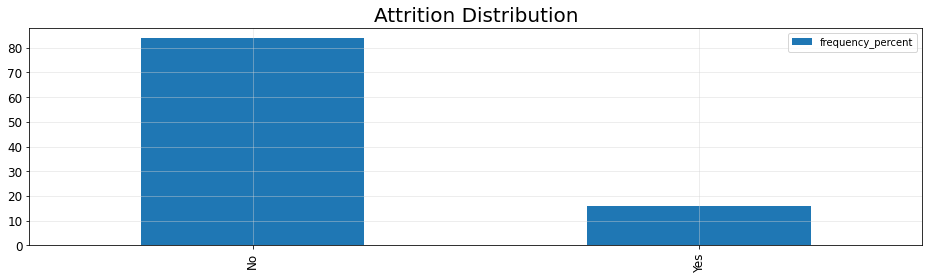

In [12]:
attrition_freq = emp_data_org[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()),2)

print(attrition_freq)

# Attrition distribution bar plot
plot = attrition_freq[['frequency_percent']].plot(kind="bar");
plot.set_title("Attrition Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

The quick inspection of Yes and No of the attrition distribution, we can see that there is a significant imbalance in the dataset. Thus it is needed to be mindful about handiling it.

**Exploratory Data Analysis**

1. Identifying features with null values

In [13]:
null_feat_df = pd.DataFrame()
null_feat_df['Null Count'] = emp_data_org.isnull().sum().sort_values(ascending=False)
null_feat_df['Null Pct'] = null_feat_df['Null Count'] / float(len(emp_data_org))

null_feat_df = null_feat_df[null_feat_df['Null Pct'] > 0]

total_null_feats = null_feat_df.shape[0]
null_feat_names = null_feat_df.index
print('Total number of features having null values: ', total_null_feats)
del null_feat_df

Total number of features having null values:  0


2. Categorical Features and their behaviour against attrition indicator

In [14]:
emp_viz_df = emp_data_org.copy() # Copy cleaned dataset for EDA & feature changes

# Adding two features for attrition: Employee left and not left
emp_viz_df['Attrition_Yes'] = emp_viz_df['Attrition'].map({'Yes':1, 'No':0}) # 1 means Employee Left
emp_viz_df['Attrition_No'] = emp_viz_df['Attrition'].map({'Yes':0, 'No':1}) # 1 means Employee didnt leave

emp_viz_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Attrition_No
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1


In [15]:
# getting categorical features names:
cat_col_names = emp_viz_df.select_dtypes(include=[np.object]).columns.tolist() 
cat_col_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [16]:
# Plotting of Employee Attrition against features using a function
    
def generate_frequency_graph(col_name):
    
    
    temp_grp = emp_viz_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']]
    temp_grp['Percentage Attrition'] =  temp_grp['Attrition_Yes'] / (temp_grp['Attrition_Yes'] + temp_grp['Attrition_No']) * 100
    print(temp_grp)
    emp_viz_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']].plot(kind='bar', stacked=False, color=['red', 'green'])
    plt.xlabel(col_name)
    plt.ylabel('Attrition');

                   Attrition_Yes  Attrition_No  Percentage Attrition
BusinessTravel                                                      
Non-Travel                    12           138              8.000000
Travel_Frequently             69           208             24.909747
Travel_Rarely                156           887             14.956855


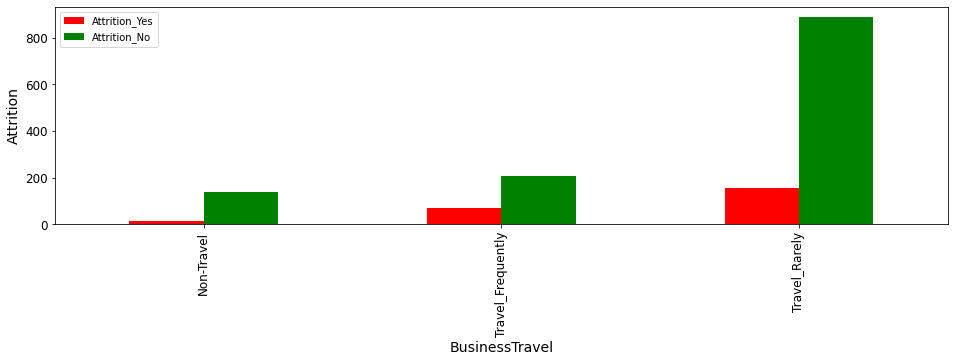

In [17]:
# Plotting of Employee Attrition against Business Travel feature
generate_frequency_graph('BusinessTravel')

                        Attrition_Yes  Attrition_No  Percentage Attrition
Department                                                               
Human Resources                    12            51             19.047619
Research & Development            133           828             13.839750
Sales                              92           354             20.627803


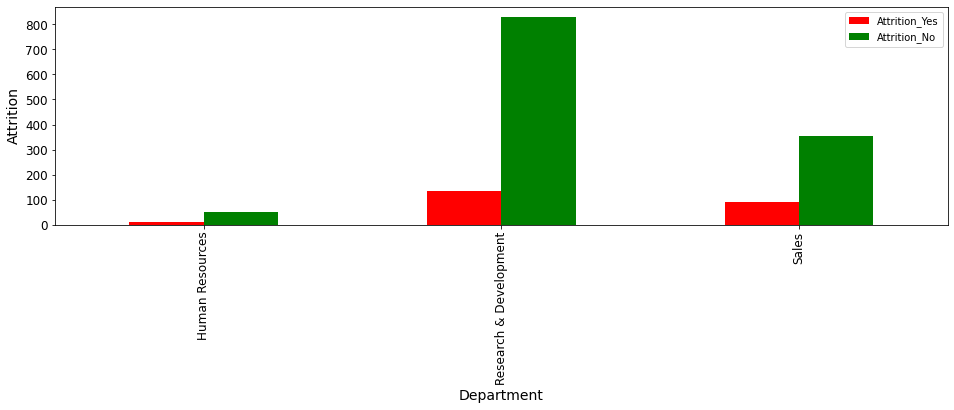

In [18]:
# Plotting of Employee Attrition against Department feature
generate_frequency_graph('Department')

        Attrition_Yes  Attrition_No  Percentage Attrition
Gender                                                   
Female             87           501             14.795918
Male              150           732             17.006803


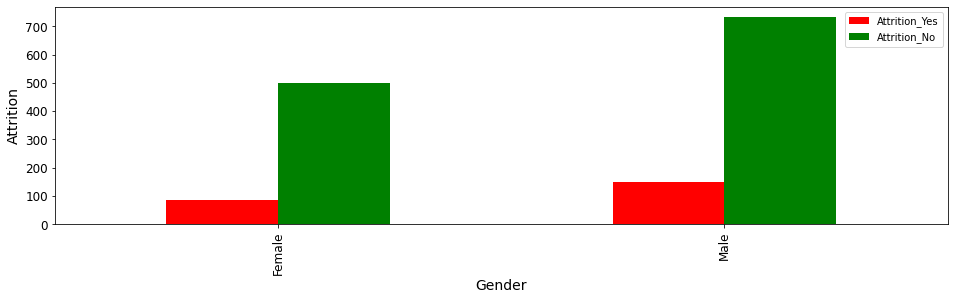

In [19]:
# Plotting of Employee Attrition against Gender feature
generate_frequency_graph('Gender')

               Attrition_Yes  Attrition_No  Percentage Attrition
MaritalStatus                                                   
Divorced                  33           294             10.091743
Married                   84           589             12.481426
Single                   120           350             25.531915


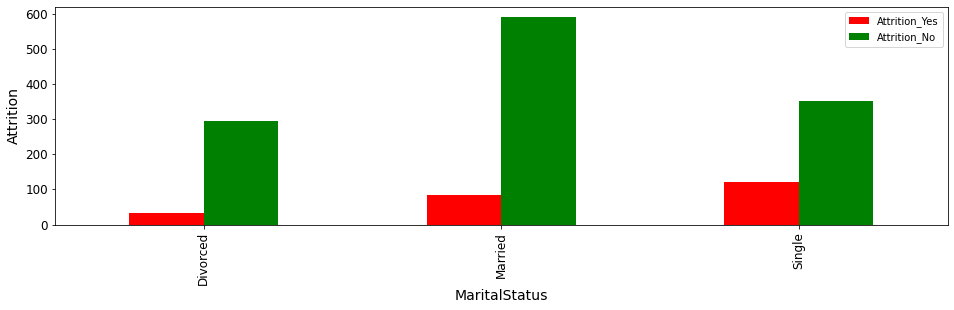

In [20]:
# Plotting of Employee Attrition against MaritalStatus feature
generate_frequency_graph('MaritalStatus')

          Attrition_Yes  Attrition_No  Percentage Attrition
OverTime                                                   
No                  110           944             10.436433
Yes                 127           289             30.528846


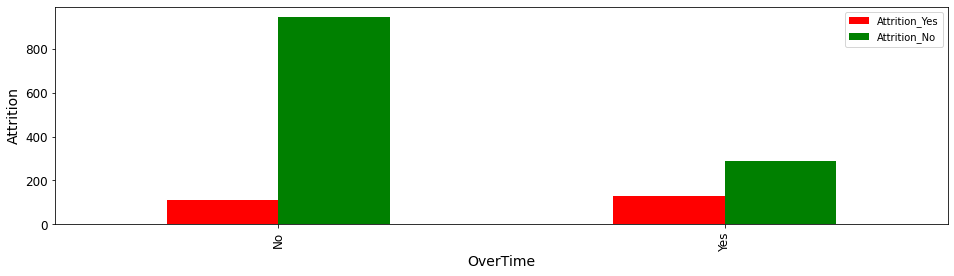

In [21]:
# Plotting of Employee Attrition against MaritalStatus feature
generate_frequency_graph('OverTime')

           Attrition_Yes  Attrition_No  Percentage Attrition
Education                                                   
1                     31           139             18.235294
2                     44           238             15.602837
3                     99           473             17.307692
4                     58           340             14.572864
5                      5            43             10.416667


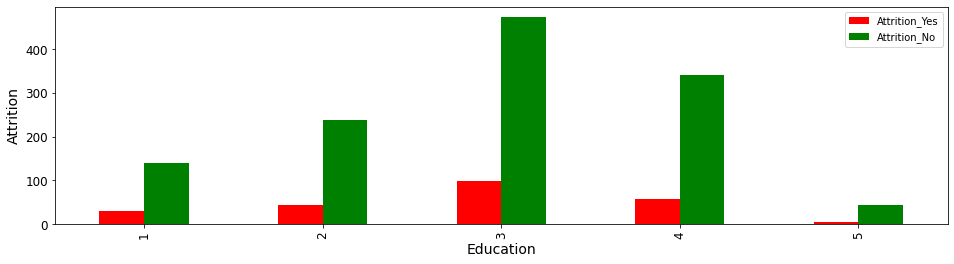

In [23]:
# Plotting of Employee Attrition against Education feature

# Representations of the indices is as follows
# 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
generate_frequency_graph('Education')

                 Attrition_Yes  Attrition_No  Percentage Attrition
JobSatisfaction                                                   
1                           66           223             22.837370
2                           46           234             16.428571
3                           73           369             16.515837
4                           52           407             11.328976


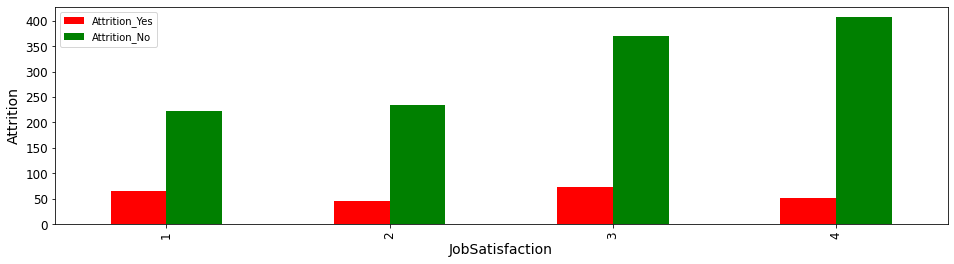

In [24]:
# Plotting of Employee Attrition against Education feature
# 1-Low, 2-Medium, 3-High, 4-Very High
generate_frequency_graph('JobSatisfaction')

                 Attrition_Yes  Attrition_No  Percentage Attrition
WorkLifeBalance                                                   
1                           25            55             31.250000
2                           58           286             16.860465
3                          127           766             14.221725
4                           27           126             17.647059


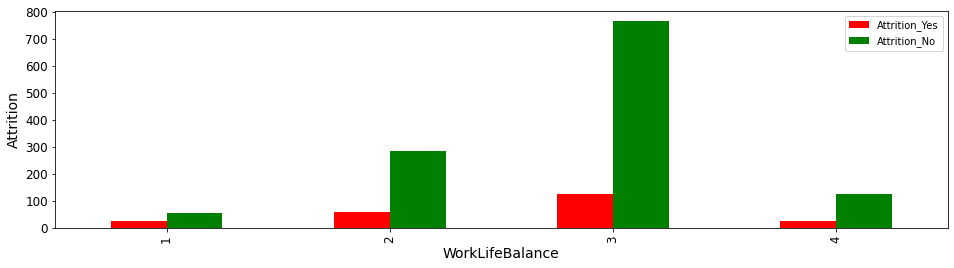

In [25]:
# Plotting of Employee Attrition against Education feature
# 1-Bad, 2-Good, 3-Better, 4-Best
generate_frequency_graph('WorkLifeBalance')

                         Attrition_Yes  Attrition_No  Percentage Attrition
EnvironmentSatisfaction                                                   
1                                   72           212             25.352113
2                                   43           244             14.982578
3                                   62           391             13.686534
4                                   60           386             13.452915


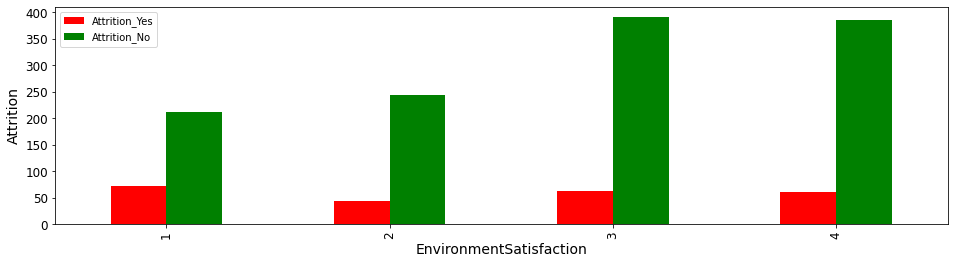

In [26]:
# Plotting of Employee Attrition against Environmental Satisfaction at the workplace
# 1-Bad, 2-Good, 3-Better, 4-Best
generate_frequency_graph('EnvironmentSatisfaction')

                Attrition_Yes  Attrition_No  Percentage Attrition
JobInvolvement                                                   
1                          28            55             33.734940
2                          71           304             18.933333
3                         125           743             14.400922
4                          13           131              9.027778


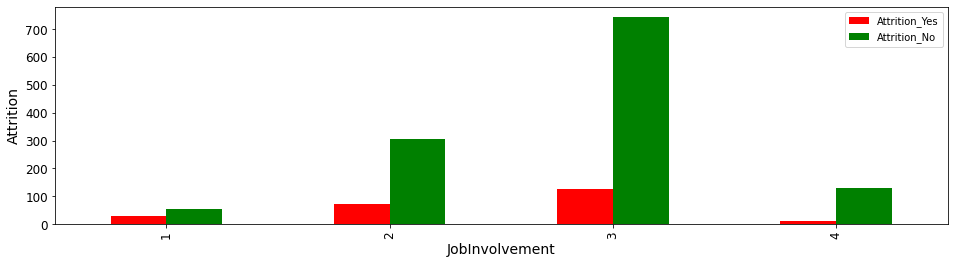

In [27]:
# Plotting of Employee Attrition against Job Involvement at the workplace
# 1-Bad, 2-Good, 3-Better, 4-Best
generate_frequency_graph('JobInvolvement')


Numerical Features for EDA

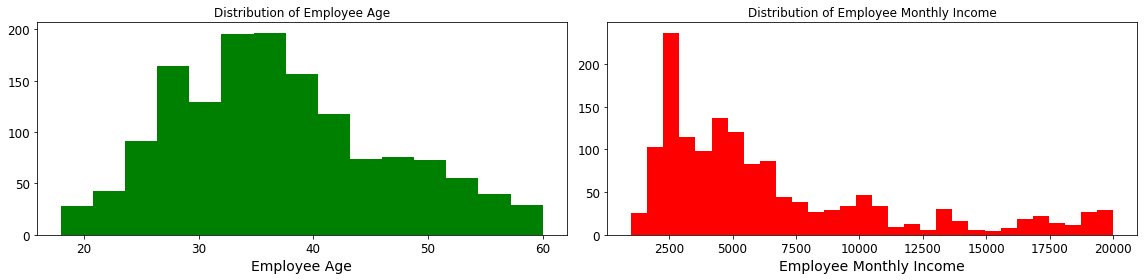

In [28]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Employee Age
plt.subplot(1,2,1)
plt.hist(emp_viz_df['Age'], bins=15, color='green')
plt.title('Distribution of Employee Age')
plt.xlabel("Employee Age")

# Histogram Plot for employee Monthly Income
plt.subplot(1,2,2)
plt.hist(emp_viz_df['MonthlyIncome'], bins=30, color='red')
plt.title('Distribution of Employee Monthly Income')
plt.xlabel("Employee Monthly Income")

fig.tight_layout();

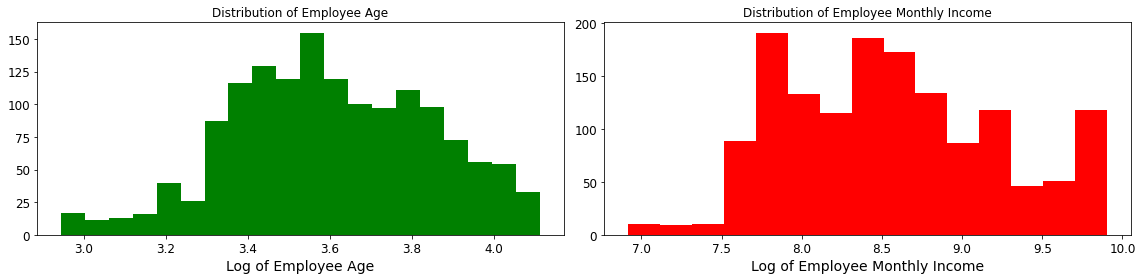

In [29]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Employee Age
plt.subplot(1,2,1)
plt.hist(np.log1p(emp_viz_df['Age']), bins=20, color='green')
plt.title('Distribution of Employee Age')
plt.xlabel("Log of Employee Age")

# Histogram Plot for employee Monthly Income
plt.subplot(1,2,2)
plt.hist(np.log1p(emp_viz_df['MonthlyIncome']), bins=15, color='red')
plt.title('Distribution of Employee Monthly Income')
plt.xlabel("Log of Employee Monthly Income")

fig.tight_layout();

In [30]:
print('Skewness in employee Age feature: ', emp_viz_df['Age'].skew())
print('Skewness in employee Monthly Income feature: ', emp_viz_df['MonthlyIncome'].skew())

Skewness in employee Age feature:  0.4132863018563338
Skewness in employee Monthly Income feature:  1.3698166808390662


**Feature Engineering**

Addition of New Features

Creating features based on the available features, which may help us in gaining more insight into the data

**Tenure per job**: Usually, people who have worked with many companies but for small periods at every organization tend to leave early as they always need a change of Organization to keep them going.

**Years without Change:** For any person, a change either in role or job level or responsibility is needed to keep the work exciting to continue. We create a variable to see how many years it has been for an employee without any sort of change using Promotion, Role and Job Change as a metric to cover different variants of change.

**Compensation Ratio:** Compensation Ratio is the ratio of the actual pay of an Employee to the midpoint of a salary range. The salary range can be that of his/her department or organization or role. The benchmark numbers can be a organization’s pay or Industry average.



In [31]:
emp_proc_df = emp_data_org.copy() # Copy cleaned dataset for feature engineering

emp_proc_df['TenurePerJob'] = 0

for i in range(0, len(emp_proc_df)):
    if emp_proc_df.loc[i,'NumCompaniesWorked'] > 0:
        emp_proc_df.loc[i,'TenurePerJob'] = emp_proc_df.loc[i,'TotalWorkingYears'] / emp_proc_df.loc[i,'NumCompaniesWorked']

emp_proc_df['YearWithoutChange1'] = emp_proc_df['YearsInCurrentRole'] - emp_proc_df['YearsSinceLastPromotion']
emp_proc_df['YearWithoutChange2'] = emp_proc_df['TotalWorkingYears'] - emp_proc_df['YearsSinceLastPromotion']

monthly_income_median = np.median(emp_proc_df['MonthlyIncome'])
emp_proc_df['CompRatioOverall'] = emp_proc_df['MonthlyIncome'] / monthly_income_median

print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))

Dataset dimension: 1470 rows, 39 columns


Removing the observations which are not required, as discussed above

In [32]:
# Features to remove based on the initial analysis
feat_to_remove = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

emp_proc_df.drop( feat_to_remove , axis = 1, inplace = True )
print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))

Dataset dimension: 1470 rows, 35 columns


In [33]:
full_col_names = emp_proc_df.columns.tolist()
num_col_names = emp_proc_df.select_dtypes(include=[np.int64,np.float64]).columns.tolist() # Get numerical feature names

# Preparing list of ordered categorical features
num_cat_col_names = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']

target = ['Attrition']

num_col_names = list(set(num_col_names) - set(num_cat_col_names)) # Numerical features w/o Ordered Categorical features
cat_col_names = list(set(full_col_names) - set(num_col_names) - set(target)) # Categorical & Ordered Categorical features

print('Total number of numerical features: ', len(num_col_names))
print('Total number of categorical & ordered categorical features: ', len(cat_col_names))

cat_emp_df = emp_proc_df[cat_col_names]
num_emp_df = emp_proc_df[num_col_names]

Total number of numerical features:  18
Total number of categorical & ordered categorical features:  16


In [34]:
for col in cat_col_names:
    col_dummies = pd.get_dummies(cat_emp_df[col], prefix=col)
    cat_emp_df = pd.concat([cat_emp_df, col_dummies], axis=1)

# Use the pandas apply method to numerically encode our attrition target variable
attrition_target = emp_proc_df['Attrition'].map({'Yes':1, 'No':0})

# Drop categorical feature for which dummy variables have been created
cat_emp_df.drop(cat_col_names, axis=1, inplace=True)

cat_emp_df.head()

,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Education_1,Education_2,Education_3,Education_4,Education_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,Department_Human Resources,Department_Research & Development,Department_Sales,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


Correlation of numerical features against attrition

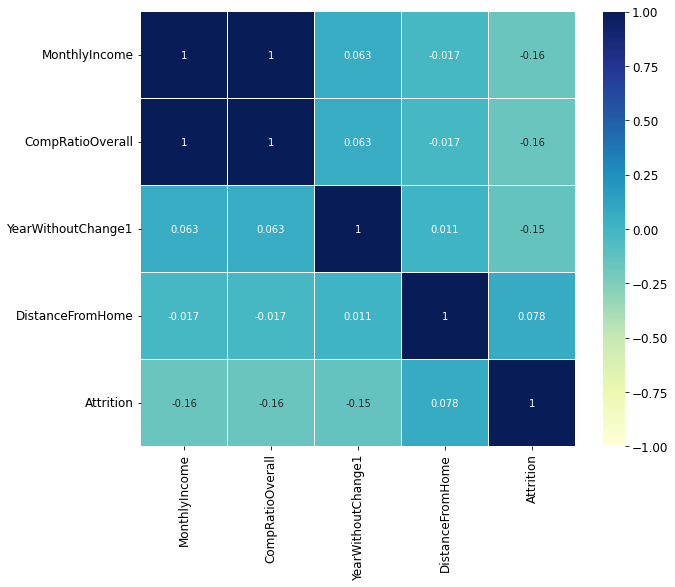

In [35]:
num_corr_df = num_emp_df[['MonthlyIncome', 'CompRatioOverall', 'YearWithoutChange1', 'DistanceFromHome']]
corr_df = pd.concat([num_corr_df, attrition_target], axis=1)
corr = corr_df.corr()

plt.figure(figsize = (10, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
#sns.heatmap(data=corr, annot=True, mask=mask, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
sns.heatmap(data=corr, annot=True, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

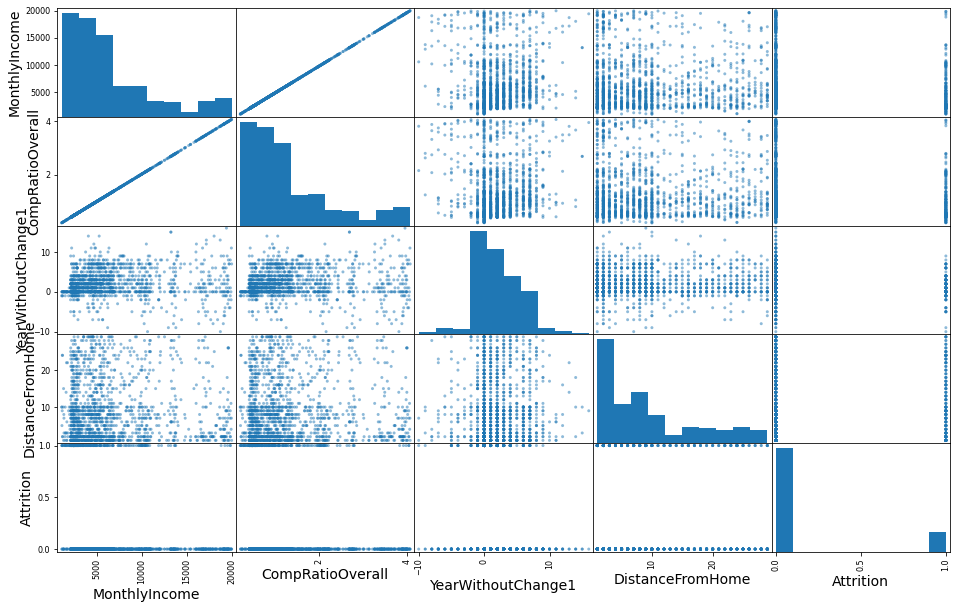

In [36]:
from pandas.plotting import scatter_matrix

scatter_matrix(corr_df, figsize=(16, 10));

In [37]:
#Concatenating two datasets columnwise
final_emp_df = pd.concat([num_emp_df, cat_emp_df], axis=1)

print('Dataset dimension after treating categorical features with dummy variables: {} rows, {} columns'.format(final_emp_df.shape[0], final_emp_df.shape[1]))
final_emp_df.head()

Dataset dimension after treating categorical features with dummy variables: 1470 rows, 82 columns


,DistanceFromHome,YearsWithCurrManager,YearsAtCompany,YearWithoutChange2,YearsInCurrentRole,YearWithoutChange1,MonthlyRate,TrainingTimesLastYear,PercentSalaryHike,CompRatioOverall,NumCompaniesWorked,MonthlyIncome,TenurePerJob,TotalWorkingYears,HourlyRate,YearsSinceLastPromotion,DailyRate,Age,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Education_1,Education_2,Education_3,Education_4,Education_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,Department_Human Resources,Department_Research & Development,Department_Sales,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1,5,6,8,4,4,19479,0,11,1.218337,8,5993,1.000000,8,94,0,1102,41,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,8,7,10,9,7,6,24907,3,23,1.042895,1,5130,10.000000,10,61,1,279,49,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,2,0,0,7,0,0,2396,3,15,0.424883,6,2090,1.166667,7,92,0,1373,37,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,3,0,8,5,7,4,23159,3,11,0.591380,1,2909,8.000000,8,56,3,1392,33,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2,2,2,4,2,0,16632,3,12,0.705021,9,3468,0.666667,6,40,2,591,27,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


**Model Building and Validation**

Here we are trying to predict a binary class, whether an employee will leave the job or not. Thus, we need to use several classification models which needs a focus on following parameters to achieve an acceptable model.

* Accuracy
* True Positive Rate
* Precision
* Specificity

**Preparing the training and testing dataset**
We will split the dataset into 70-30 ratio into training and testing respectively

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
X_train, X_val, y_train, y_val = train_test_split(final_emp_df, attrition_target,
                                                  test_size= 0.30, random_state=42);

print("Stratified Sampling: ", len(X_train), "train set +", len(X_val), "validation set")

Stratified Sampling:  1029 train set + 441 validation set


We will be using following ML binary classification models and comparing them to find the best model for our predictions:
* Logistic Regression
* Random Forest Classifier
* AdaBoost Classifier
* Gradient Boosting Classifier
* Extra Trees Classifier
* Decision Tree Classifier


In [39]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score

In [41]:
#Creating a function to find the performance of a given model
def gen_model_performance(actual_target, pred_target):
    model_conf_matrix = confusion_matrix(actual_target, pred_target)
    model_roc_score = roc_auc_score(actual_target, pred_target)
    model_accuracy = accuracy_score(actual_target, pred_target) * 100.0
    
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;
    
    return sensitivity, specificity, model_accuracy, precision, model_roc_score

In [42]:
def evaluate_model_score(X, y, scoring='accuracy'):
    
    logreg_model = LogisticRegression(random_state=0)
    logreg_cv_model = LogisticRegressionCV()
    rfc_model = RandomForestClassifier()
    extrees_model = ExtraTreesClassifier()
    gboost_model = GradientBoostingClassifier()
    dt_model = DecisionTreeClassifier()
    aboost_model = AdaBoostClassifier()
    gnb_model = GaussianNB()

    models = [logreg_model, logreg_cv_model, dt_model, rfc_model, 
              extrees_model, gboost_model, aboost_model, gnb_model]
    
    model_results = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "CV Score",
                                            "Sensitivity","Specificity","ROC Score"])
    
    for model in models:
        model.fit(X, y,)
        y_pred = model.predict(X)
        score = cross_val_score(model, X, y, cv=5, scoring=scoring)
        
        sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y, y_pred)
    
        scores = cross_val_score(model, X, y, cv=5)
    
        model_results = model_results.append({"Model": model.__class__.__name__,
                              "Accuracy": accuracy, "Precision": precision,
                              "CV Score": scores.mean()*100.0,
                              "Sensitivity": sensitivity, "Specificity": specificity,
                              "ROC Score": roc_score}, ignore_index=True)
    return model_results

**Training Models and Evaluating using cross-validation**

In [43]:
model_results = evaluate_model_score(X_train, y_train)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,83.576288,70.588235,83.284869,6.818182,99.413834,0.531160
1,LogisticRegressionCV,88.435374,87.012987,87.076960,38.068182,98.827667,0.684479
2,DecisionTreeClassifier,100.000000,100.000000,78.329623,100.000000,100.000000,1.000000
3,RandomForestClassifier,100.000000,100.000000,85.227563,100.000000,100.000000,1.000000
4,ExtraTreesClassifier,100.000000,100.000000,85.617807,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,96.209913,100.000000,85.323704,77.840909,100.000000,0.889205
6,AdaBoostClassifier,90.573372,84.955752,87.075065,54.545455,98.007034,0.762762
7,GaussianNB,70.359572,34.074074,69.487568,78.409091,68.698710,0.735539


We can observe 3 models which performs very well i.e. RandomForestClassifier, GradientBoostingClassifier & AdaBoostClassifier.

Out of 3 models, we can see cross validation score of AdaBoostClassifier is best and Sensitivity i.e. Recall rate of RandomForestClassifier is the best.

Our goal is to identify whether employee will leave or not i.e. Attrition=1 which means our Sensitivity metric is the main evaluation metric along with Precision and Accuracy.

Even though DecisionTreeClassifier & ExtraTreesClassifier has 100% Accuracy which means model is overfitting, hence not selected.

In [45]:
rfc_model = RandomForestClassifier();

refclasscol = X_train.columns

# fit random forest classifier on the training set
rfc_model.fit(X_train, y_train);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# random forest classifier parameters used for feature importances
print(rfc_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


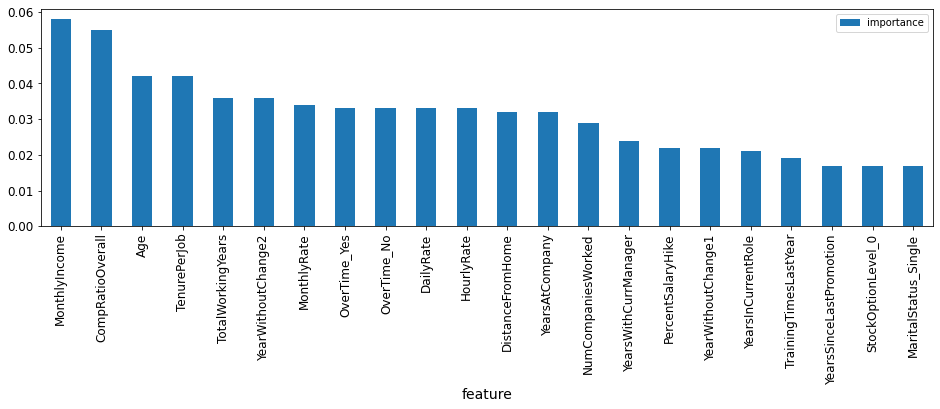

In [46]:
high_imp_df = importances[importances.importance>=0.015]
high_imp_df.plot.bar();
del high_imp_df

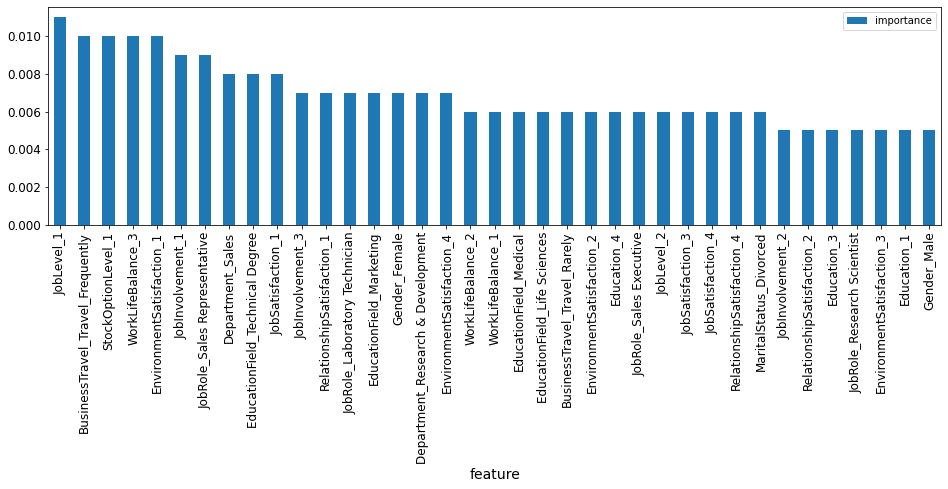

In [47]:
mid_imp_df = importances[importances.importance<=0.015]
mid_imp_df = mid_imp_df[mid_imp_df.importance>=0.0050]
mid_imp_df.plot.bar();
del mid_imp_df

In [50]:
model_results = evaluate_model_score(X_train_select, y_train)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,83.576288,88.888889,83.479517,4.545455,99.882767,0.522141
1,LogisticRegressionCV,88.241011,86.666667,86.685768,36.931818,98.827667,0.678797
2,DecisionTreeClassifier,100.000000,100.000000,78.427658,100.000000,100.000000,1.000000
3,RandomForestClassifier,100.000000,100.000000,85.422212,100.000000,100.000000,1.000000
4,ExtraTreesClassifier,100.000000,100.000000,85.812456,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,96.209913,100.000000,85.227563,77.840909,100.000000,0.889205
6,AdaBoostClassifier,90.379009,83.478261,86.782856,54.545455,97.772567,0.761590
7,GaussianNB,76.287658,39.634146,75.900545,73.863636,76.787808,0.753257


In [52]:
final_rfc_model = RandomForestClassifier()
final_rf_scores = cross_val_score(final_rfc_model, X_train_select, y_train, cv=5)

final_rfc_model.fit(X_train_select, y_train)
y_trn_pred = final_rfc_model.predict(X_train_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train, y_trn_pred)

print("Train Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, final_rf_scores.mean()*100.0, sensitivity, specificity))
print('\n')

y_val_pred = final_rfc_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))
print('\n')

Train Accuracy: 100.00%, Precision: 100.00%, CV Mean Score=85.13%, Sensitivity=100.00%, Specificity=100.00%


Validation Accuracy: 86.62%, Precision: 60.00%, Sensitivity=9.84%, Specificity=98.95%




We can see that their is a significant difference between the results we got for training accuracy and validation accuracy.

This is because of the skewed target variable data. We will handle this target class imbalance using SMOTE


**Handling Target Class Imbalance**

In [53]:
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampler.fit_sample(X_train_select, y_train)

Now, training and validating the model over SMOTE dataset

In [54]:
model_results = evaluate_model_score(X_train_smote, y_train_smote)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,68.522860,66.772824,68.581914,73.739742,63.305979,0.685229
1,LogisticRegressionCV,80.832356,79.550562,79.953525,83.001172,78.663540,0.808324
2,DecisionTreeClassifier,100.000000,100.000000,86.119086,100.000000,100.000000,1.000000
3,RandomForestClassifier,100.000000,100.000000,90.461834,100.000000,100.000000,1.000000
4,ExtraTreesClassifier,100.000000,100.000000,93.912641,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,97.303634,99.388005,87.769032,95.193435,99.413834,0.973036
6,AdaBoostClassifier,94.314185,95.323741,86.653462,93.200469,95.427902,0.943142
7,GaussianNB,74.325909,69.447048,73.563650,86.869871,61.781946,0.743259


We can observe that after applying SMOTE technique the accuracy of all the models have increased including Sensitivity & Precision metrics

In [56]:
final_rfc_model = RandomForestClassifier()
final_rf_scores = cross_val_score(final_rfc_model, X_train_smote, y_train_smote, cv=5)

final_rfc_model.fit(X_train_smote, y_train_smote)
y_trn_pred = final_rfc_model.predict(X_train_smote)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train_smote, y_trn_pred)

print("Train Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, final_rf_scores.mean()*100.0, sensitivity, specificity))
print('\n')

y_val_pred = final_rfc_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))
print('\n')

Train Accuracy: 100.00%, Precision: 100.00%, CV Mean Score=90.70%, Sensitivity=100.00%, Specificity=100.00%


Validation Accuracy: 87.30%, Precision: 64.71%, Sensitivity=18.03%, Specificity=98.42%





**Identifying the best Hyper-Parameters of the Model**


Once the model is build, we can tune the hyper-parameters of the model to get the best score and parameters. This will help us in getting better accuracy model. This can be achieved by **GridSearchCV** library by passing a range of values for different parameters.

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Hyperparameters Tuning for Random Forest
rfc_param_grid = {
                 'max_depth' : [None, 4, 6, 8],
                 'n_estimators': [10, 30, 50],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 }
rfc_best_model = RandomForestClassifier()
rfc_cross_val = StratifiedKFold(n_splits=5)

rfc_grid_search = GridSearchCV(rfc_best_model,
                               scoring='accuracy',
                               param_grid=rfc_param_grid,
                               cv=rfc_cross_val,
                               verbose=1)

rfc_grid_search.fit(X_train_smote, y_train_smote)
rfc_model = rfc_grid_search
rfc_parameters = rfc_grid_search.best_params_

rfc_best_model = RandomForestClassifier(**rfc_parameters)

scores = cross_val_score(rfc_best_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    
print('Cross-validation of : {0}'.format(rfc_best_model.__class__))
print('After Hyperparameters tuning CV score = {0}'.format(np.mean(scores) * 100.0))
print('Best score: {}'.format(rfc_grid_search.best_score_))
print('Best parameters: {}'.format(rfc_grid_search.best_params_))

rfc_best_model.fit(X_train_smote, y_train_smote)
y_trn_pred = rfc_best_model.predict(X_train_smote)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train_smote, y_trn_pred)

print("\nTrain Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, scores.mean()*100.0, sensitivity, specificity))
print('\n')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  2.4min finished


Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
After Hyperparameters tuning CV score = 90.11009929515872
Best score: 0.9057965049476084
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}

Train Accuracy: 100.00%, Precision: 100.00%, CV Mean Score=90.11%, Sensitivity=100.00%, Specificity=100.00%




In [58]:
y_val_pred = rfc_best_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))



Validation Accuracy: 86.85%, Precision: 58.82%, Sensitivity=16.39%, Specificity=98.16%
